# Ворошилов Владислав
# ПИ20-3


## Семинар 14
## Понижение размерности

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## 1.Загрузите прилагающийся датасет credit_data.

In [2]:
df = pd.read_csv("./credit_data.csv", index_col = 0)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
target = df['Risk']
df = df.drop(['Risk', 'Purpose'], axis=1)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24


## 2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [4]:
df.dtypes[df.dtypes == "object"]

Sex                 object
Housing             object
Saving accounts     object
Checking account    object
dtype: object

In [5]:
for col in df.dtypes[df.dtypes == "object"].keys():
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-"*10)

Column: Sex
male      690
female    310
Name: Sex, dtype: int64
----------
Column: Housing
own     713
rent    179
free    108
Name: Housing, dtype: int64
----------
Column: Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
----------
Column: Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
----------


In [6]:
# # Способ, предложенный автором
# df['Saving accounts'] = df['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
# df['Checking account'] = df['Checking account'].map({"little":1,"moderate":2,"rich":3 });
# target = target.map({"good":1,"bad":0});
# df['Saving accounts'] = df['Saving accounts'].fillna(0)
# df['Checking account'] = df['Checking account'].fillna(0)
# df = pd.get_dummies(df)
# df.head()

### Шкалы столбцов Saving accounts и Checking account являются ординарными, поэтому для их перевода в число будем использовать LabelEncoder
### Шкалы остальных столбцов являются номинальными, поэтому будем использовать OneHotEncoder

#### Saving accounts

In [7]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [8]:
df["Saving accounts"] = df["Saving accounts"].fillna("Nan")

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Saving accounts"] = le.fit_transform(df["Saving accounts"].values)

In [10]:
pd.DataFrame({"Text value": le.classes_, "Numeric value": le.transform(le.classes_)})

,Text value,Numeric value
0,Nan,0
1,little,1
2,moderate,2
3,quite rich,3
4,rich,4


#### Checking account

In [11]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [12]:
df["Checking account"] = df["Checking account"].fillna("NaN")

In [13]:
le = LabelEncoder()
df["Checking account"] = le.fit_transform(df["Checking account"].values)
pd.DataFrame({"Text value": le.classes_, "Numeric value": le.transform(le.classes_)})

,Text value,Numeric value
0,NaN,0
1,little,1
2,moderate,2
3,rich,3


#### Остальные столбцы

In [14]:
df = pd.get_dummies(data=df, columns=df.dtypes[df.dtypes == "object"].keys())
df.dtypes

Age                 int64
Job                 int64
Saving accounts     int64
Checking account    int64
Credit amount       int64
Duration            int64
Sex_female          uint8
Sex_male            uint8
Housing_free        uint8
Housing_own         uint8
Housing_rent        uint8
dtype: object

#### Целевой столбец

In [15]:
target = target = target.map({"good":1,"bad":0})

## 3. Выведите информацию о количественных параметрах датасета.

In [16]:
print(f"Датасет имеет\nСтрок: {df.shape[0]}\nСтолбцов: {df.shape[1]}")

Датасет имеет
Строк: 1000
Столбцов: 11


## 4. Разделите эти данные на тестовую и обучающую выборки

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [19]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

## 6. Оцените полученную модель с помощью метрик.

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.05      0.10        58
           1       0.72      0.99      0.83       142

    accuracy                           0.72       200
   macro avg       0.73      0.52      0.47       200
weighted avg       0.73      0.72      0.62       200



Text(0.5, 22.249999999999993, 'Предсказанные значения')

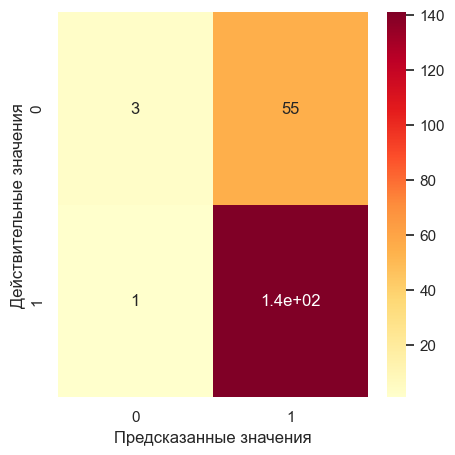

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pd.DataFrame(
    confusion_matrix(y_test, y_pred)),
    annot=True,
    cmap=sns.color_palette("YlOrRd", as_cmap=True)
)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

## 7. Понизьте размерность данных с помощью метода главных компонент.

In [22]:
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=1)
X_train_c1 = pca_1.fit_transform(X_train)
X_test_c1 = pca_1.transform(X_test)

## 8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [23]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train_c1, y_train)

y_pred = rf.predict(X_test_c1)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.71      1.00      0.83       142

    accuracy                           0.71       200
   macro avg       0.86      0.51      0.43       200
weighted avg       0.80      0.71      0.60       200



Text(0.5, 22.249999999999993, 'Предсказанные значения')

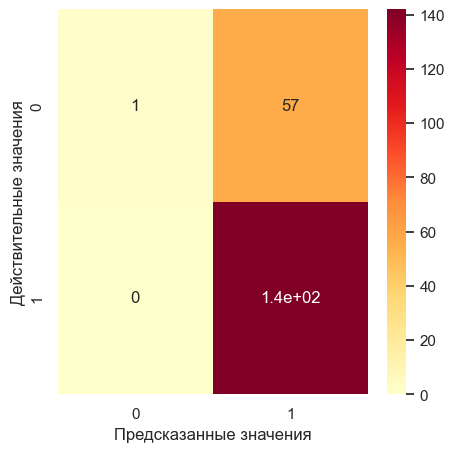

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pd.DataFrame(
    confusion_matrix(y_test, y_pred)),
    annot=True,
    cmap=sns.color_palette("YlOrRd", as_cmap=True)
)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

## 9. Постройте график зависимости точности модели от размерности данных.

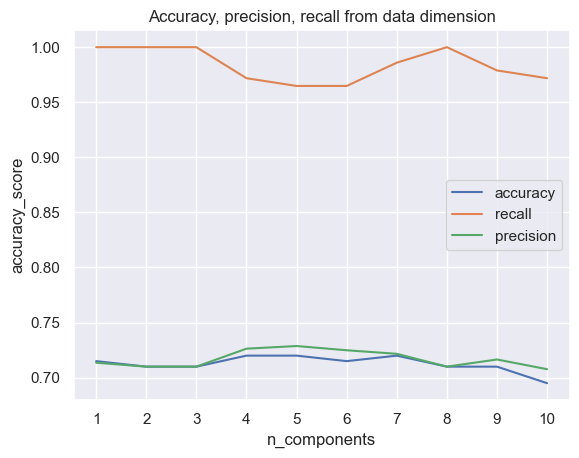

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracies = []
recalls = []
precisions = []
for i in range(1, X_train.shape[1]):
    pca_temp = PCA(n_components=i)
    X_train_ = pca_temp.fit_transform(X_train)
    X_test_ = pca_temp.transform(X_test)
    temp_model = RandomForestClassifier(max_depth=2, random_state=0)
    temp_model.fit(X_train_, y_train)
    temp_predict = temp_model.predict(X_test_)
    accuracies.append(accuracy_score(y_test, temp_predict))
    recalls.append(recall_score(y_test, temp_predict))
    precisions.append(precision_score(y_test, temp_predict))


plt.plot(range(1, X_train.shape[1]), accuracies, label="accuracy")
plt.plot(range(1, X_train.shape[1]), recalls, label="recall")
plt.plot(range(1, X_train.shape[1]), precisions, label="precision")
plt.xticks(range(1, X_train.shape[1]))
plt.title('Accuracy, precision, recall from data dimension')
plt.ylabel('accuracy_score')
plt.xlabel('n_components')
plt.grid(True)
plt.legend()

plt.show()

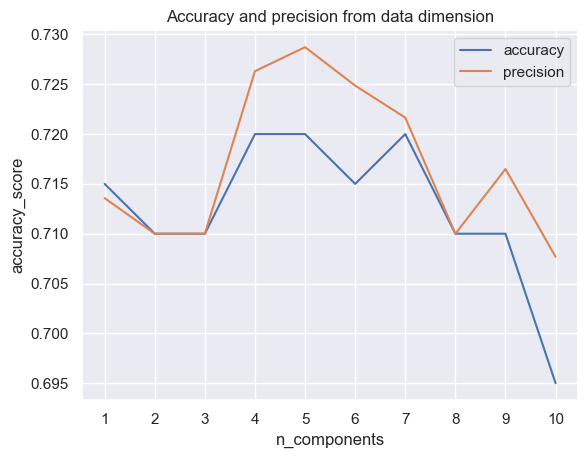

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracies = []
precisions = []
for i in range(1, X_train.shape[1]):
    pca_temp = PCA(n_components=i)
    X_train_ = pca_temp.fit_transform(X_train)
    X_test_ = pca_temp.transform(X_test)
    temp_model = RandomForestClassifier(max_depth=2, random_state=0)
    temp_model.fit(X_train_, y_train)
    temp_predict = temp_model.predict(X_test_)
    accuracies.append(accuracy_score(y_test, temp_predict))
    precisions.append(precision_score(y_test, temp_predict))


plt.plot(range(1, X_train.shape[1]), accuracies, label="accuracy")
plt.plot(range(1, X_train.shape[1]), precisions, label="precision")
plt.xticks(range(1, X_train.shape[1]))
plt.title('Accuracy and precision from data dimension')
plt.ylabel('accuracy_score')
plt.xlabel('n_components')
plt.grid(True)
plt.legend()

plt.show()